# **Customer Segmentation**
## **Project Overview**
This project focuses on segmenting the Electric Vehicle (EV) market in India to identify key customer groups based on their preferences, behaviors, and demographics. The insights derived from this segmentation will aid in tailoring marketing strategies, improving product offerings, and boosting customer satisfaction. The analysis uses customer survey data to understand preferences regarding EV features, charging infrastructure, and price sensitivity.

## **Dataset Description**
The dataset used for this project contains demographic information and customer preferences. The columns include:

**ID:** Unique identifier for each customer.

**Gender:** Customer's gender.

**Ever_Married:** Marital status of the customer.

**Age:** Age of the customer.

**Graduated:** Whether the customer has completed their graduation.

**Profession:** The customer's profession.

**Work_Experience:** Number of years of work experience.

**Spending_Score:** A metric indicating the customer's spending habits.

**Family_Size:** Number of family members in the customer's household.

**Var_1:** Additional customer feature (e.g., preferred type of EV).

**Segmentation:** The segment or cluster each customer belongs to based on their preferences and demographics.

## **Load DataSets**

## **Import Relevant Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:

test=  pd.read_csv("Test.csv")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


## **Data cleaning and Data preprocessing**

In [4]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


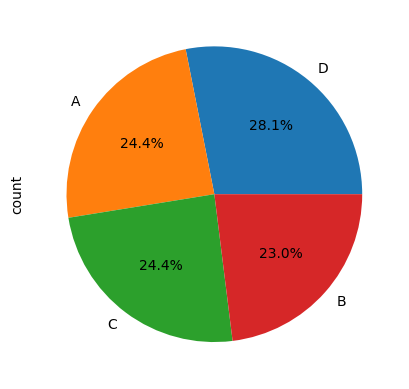

In [7]:
train['Segmentation'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

## **Gender**

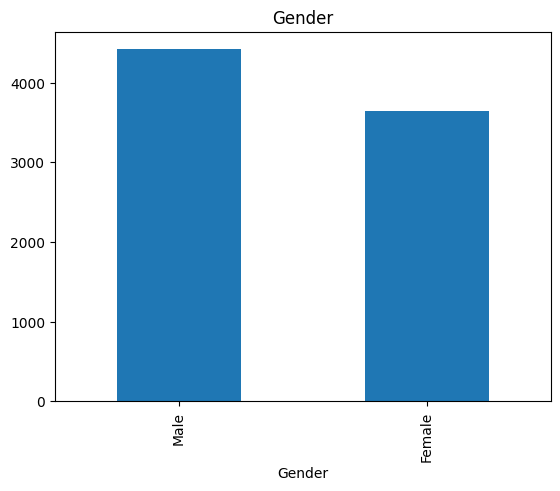

In [8]:
train['Gender'].value_counts().plot(kind='bar')
plt.title("Gender")
plt.show()

In [9]:
train['Gender'] = train['Gender'].replace({"Male":1,"Female":0})
test["Gender"]= test["Gender"].replace({"Male":1,"Female":0})

C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\1314081816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Gender'] = train['Gender'].replace({"Male":1,"Female":0})
C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\1314081816.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Gender"]= test["Gender"].replace({"Male":1,"Female":0})


In [10]:
train["Gender"].value_counts()

Gender
1    4417
0    3651
Name: count, dtype: int64

In [11]:
test["Gender"].value_counts()

Gender
1    1424
0    1203
Name: count, dtype: int64

In [12]:
train['Gender'].isnull().sum()

np.int64(0)

In [13]:
test['Gender'].isnull().sum()

np.int64(0)

## **Ever_Married**

In [14]:
train['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
train["Ever_Married"].isnull().sum()
test['Ever_Married'].isnull().sum()

np.int64(50)

In [16]:
train['Ever_Married']=train['Ever_Married'].replace({"Yes":1,"No":0})
test['Ever_Married']=test['Ever_Married'].replace({"Yes":1,"No":0})

C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\1359616084.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Ever_Married']=train['Ever_Married'].replace({"Yes":1,"No":0})
C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\1359616084.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Ever_Married']=test['Ever_Married'].replace({"Yes":1,"No":0})


In [17]:
train['Ever_Married']= train['Ever_Married'].fillna(1)
test['Ever_Married']=test['Ever_Married'].fillna(1)

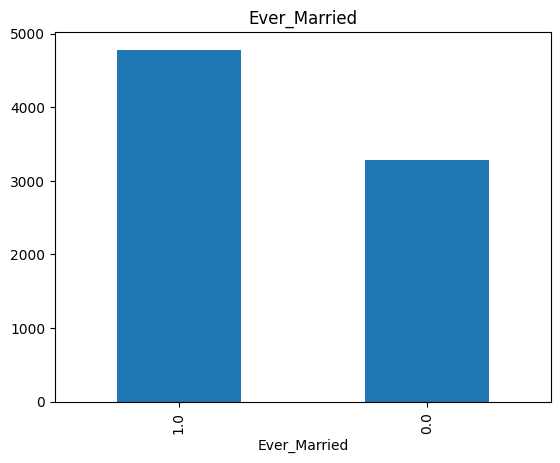

In [18]:
train['Ever_Married'].value_counts().plot(kind='bar')
plt.title('Ever_Married')
plt.show()

## **Age**

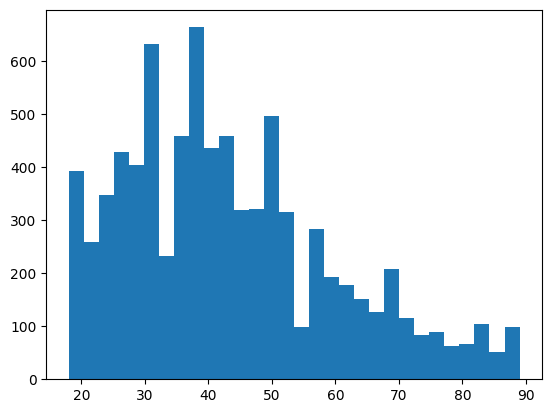

In [19]:
plt.hist(train['Age'], bins= 30)
plt.show()

In [20]:
train["Age"].isnull().sum()
test['Age'].isnull().sum()

np.int64(0)

<Axes: xlabel='Age', ylabel='count'>

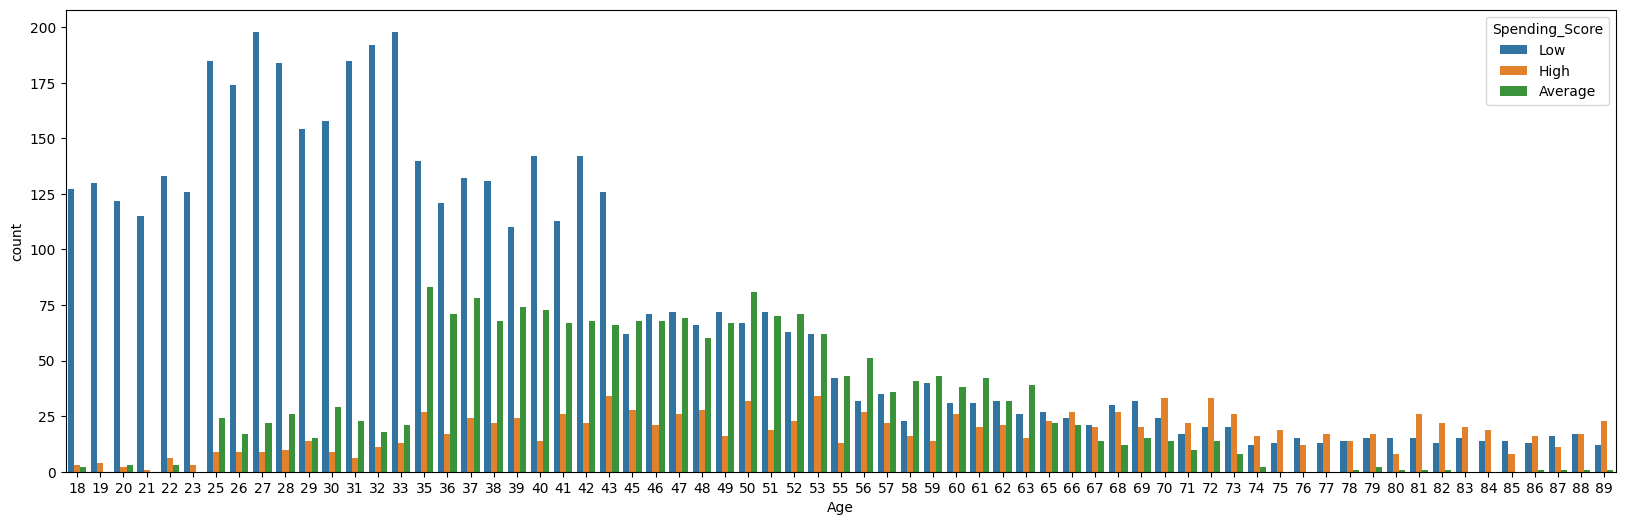

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=train, hue="Spending_Score")

## **Graduated**

In [22]:
train['Graduated'].isnull().sum()

np.int64(78)

In [23]:
test["Graduated"].isnull().sum()

np.int64(24)

In [24]:
test["Graduated"]= test["Graduated"].replace({"Yes":1,"No":0})
train['Graduated']=train['Graduated'].replace({"Yes":1,"No":0})

C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\2934507215.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Graduated"]= test["Graduated"].replace({"Yes":1,"No":0})
C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\2934507215.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Graduated']=train['Graduated'].replace({"Yes":1,"No":0})


In [25]:
test["Graduated"] = test["Graduated"].fillna(1)
train['Graduated']=train['Graduated'].fillna(1)

In [26]:
train['Graduated'].isnull().sum()

np.int64(0)

In [27]:
test['Graduated'].isnull().sum()

np.int64(0)

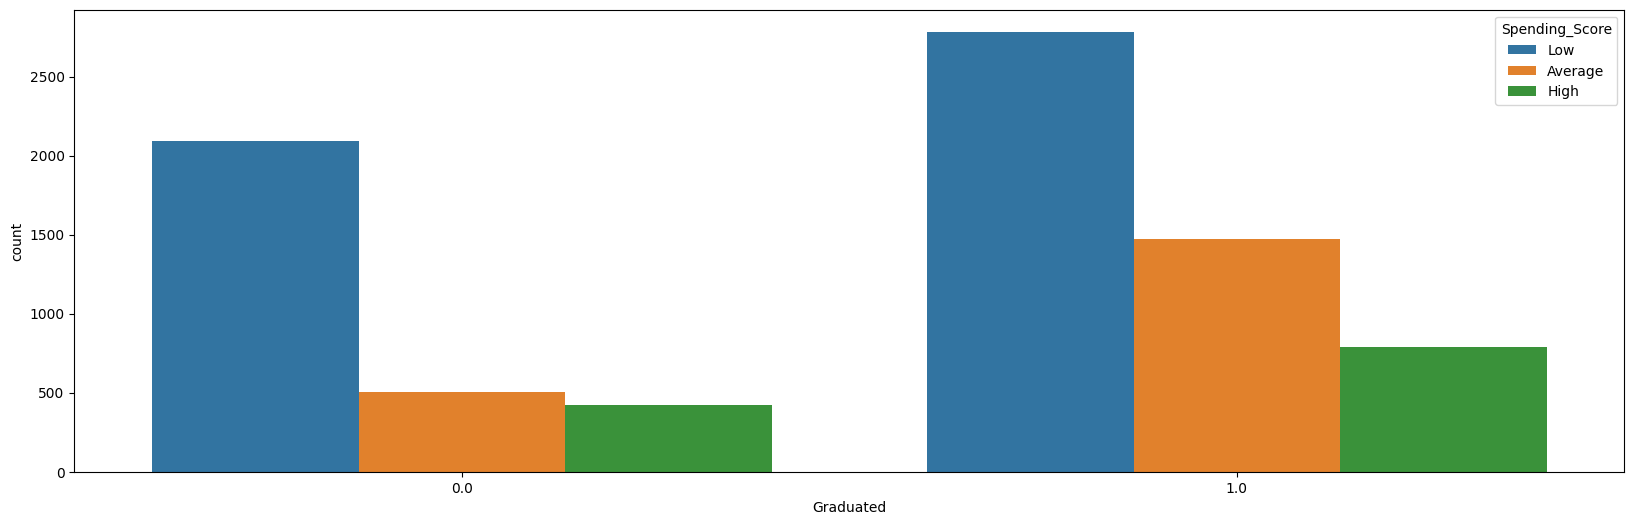

In [28]:
plt.figure(figsize=(20,6))
sns.countplot(x="Graduated", data=train, hue="Spending_Score")
plt.show()


## **Profession**

In [29]:
train["Profession"].isnull().sum()

np.int64(124)

In [30]:
test["Profession"].isnull().sum()

np.int64(38)

In [31]:
train["Profession"].value_counts()

Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="most_frequent")

In [33]:
train['Profession'] = train['Profession'].fillna(train['Profession'].mode()[0])
test['Profession'] = test['Profession'].fillna(test['Profession'].mode()[0])

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Profession"]=le.fit_transform(train["Profession"])
test["Profession"]= le.fit_transform(test["Profession"])

In [35]:


train["Profession"].unique()

array([5, 2, 7, 3, 0, 4, 1, 6, 8])

In [36]:
test["Profession"].unique()

array([2, 5, 0, 4, 8, 1, 7, 3, 6])

In [37]:
train["Profession"].head()

0    5
1    2
2    2
3    7
4    3
Name: Profession, dtype: int64

In [38]:
test["Profession"].head()

0    2
1    5
2    0
3    4
4    8
Name: Profession, dtype: int64

In [39]:
train["Profession"].isnull().sum()

np.int64(0)

In [40]:
test['Profession'].isnull().sum()

np.int64(0)

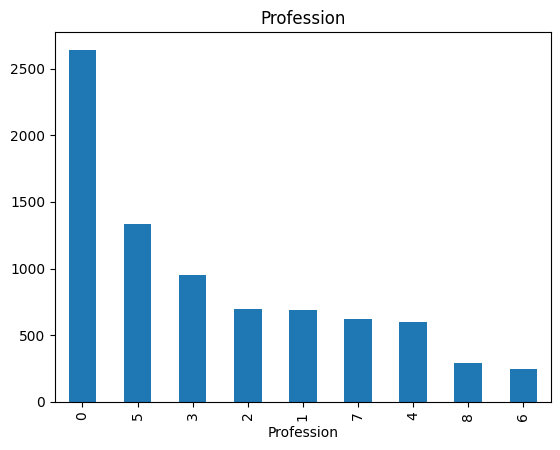

In [41]:
train["Profession"].value_counts().plot(kind='bar')
plt.title("Profession")
plt.show()

## **Work_Experience**

In [42]:
train['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [43]:
train['Work_Experience'].isnull().sum()

np.int64(829)

In [44]:

si_num =SimpleImputer(strategy = 'median')

In [45]:
train['Work_Experience']= si_num.fit_transform(train[['Work_Experience']])
test['Work_Experience'] = si_num.fit_transform(test[["Work_Experience"]])

In [46]:
train['Work_Experience'].isnull().sum()

np.int64(0)

In [47]:
test['Work_Experience'].isnull().sum()

np.int64(0)

In [48]:
train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

<Axes: xlabel='Work_Experience', ylabel='count'>

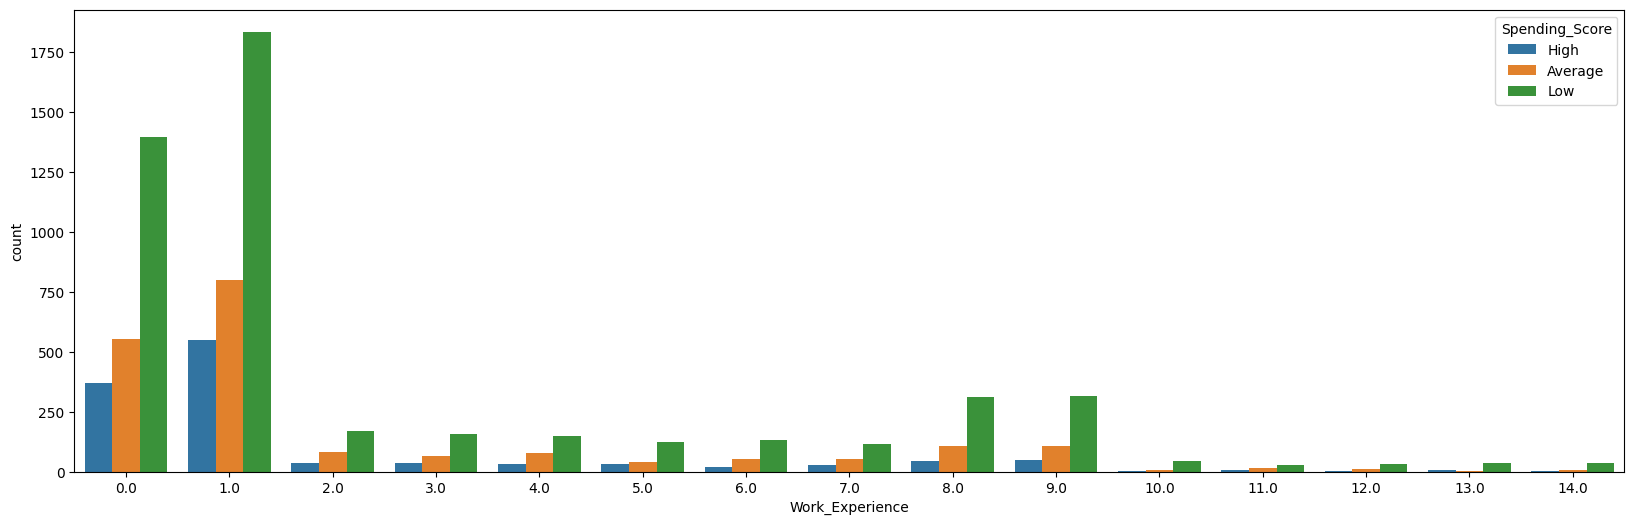

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(x="Work_Experience", data=train, hue="Spending_Score")

## **Spending Score**

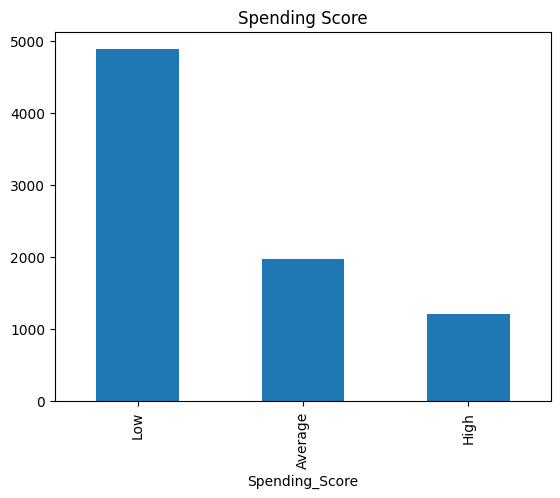

In [50]:
train['Spending_Score'].value_counts().plot(kind = "bar")
plt.title("Spending Score")
plt.show()

In [51]:
train['Spending_Score'].isnull().sum()

np.int64(0)

In [52]:

test['Spending_Score'].isnull().sum()

np.int64(0)

In [53]:
train['Spending_Score'] = train['Spending_Score'].replace({"Low":0,"Average":1,"High":2})

test['Spending_Score'] = test['Spending_Score'].replace({"Low":0,"Average":1,"High":2})

C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\2859569801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Spending_Score'] = train['Spending_Score'].replace({"Low":0,"Average":1,"High":2})
C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\2859569801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Spending_Score'] = test['Spending_Score'].replace({"Low":0,"Average":1,"High":2})


In [54]:

test['Spending_Score'].unique()

array([0, 1, 2])

## **Family_Size**

In [55]:
train["Family_Size"].unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [56]:
train['Family_Size'].isnull().sum()

np.int64(335)

In [57]:
test['Family_Size'].isnull().sum()

np.int64(113)

In [58]:
train['Family_Size']= train['Family_Size'].fillna(2)
test['Family_Size']=test['Family_Size'].fillna(2)

In [59]:
train['Family_Size'].isnull().sum()

np.int64(0)

<Axes: xlabel='Family_Size', ylabel='count'>

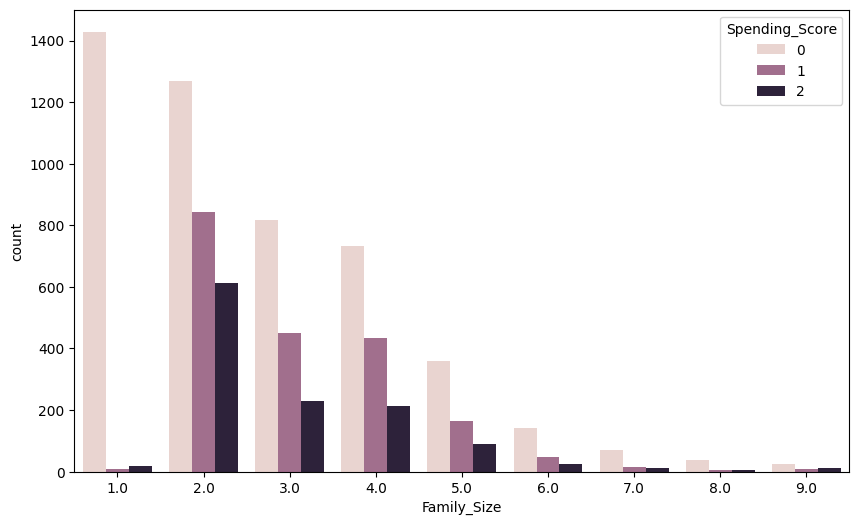

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x="Family_Size", data=train, hue="Spending_Score")

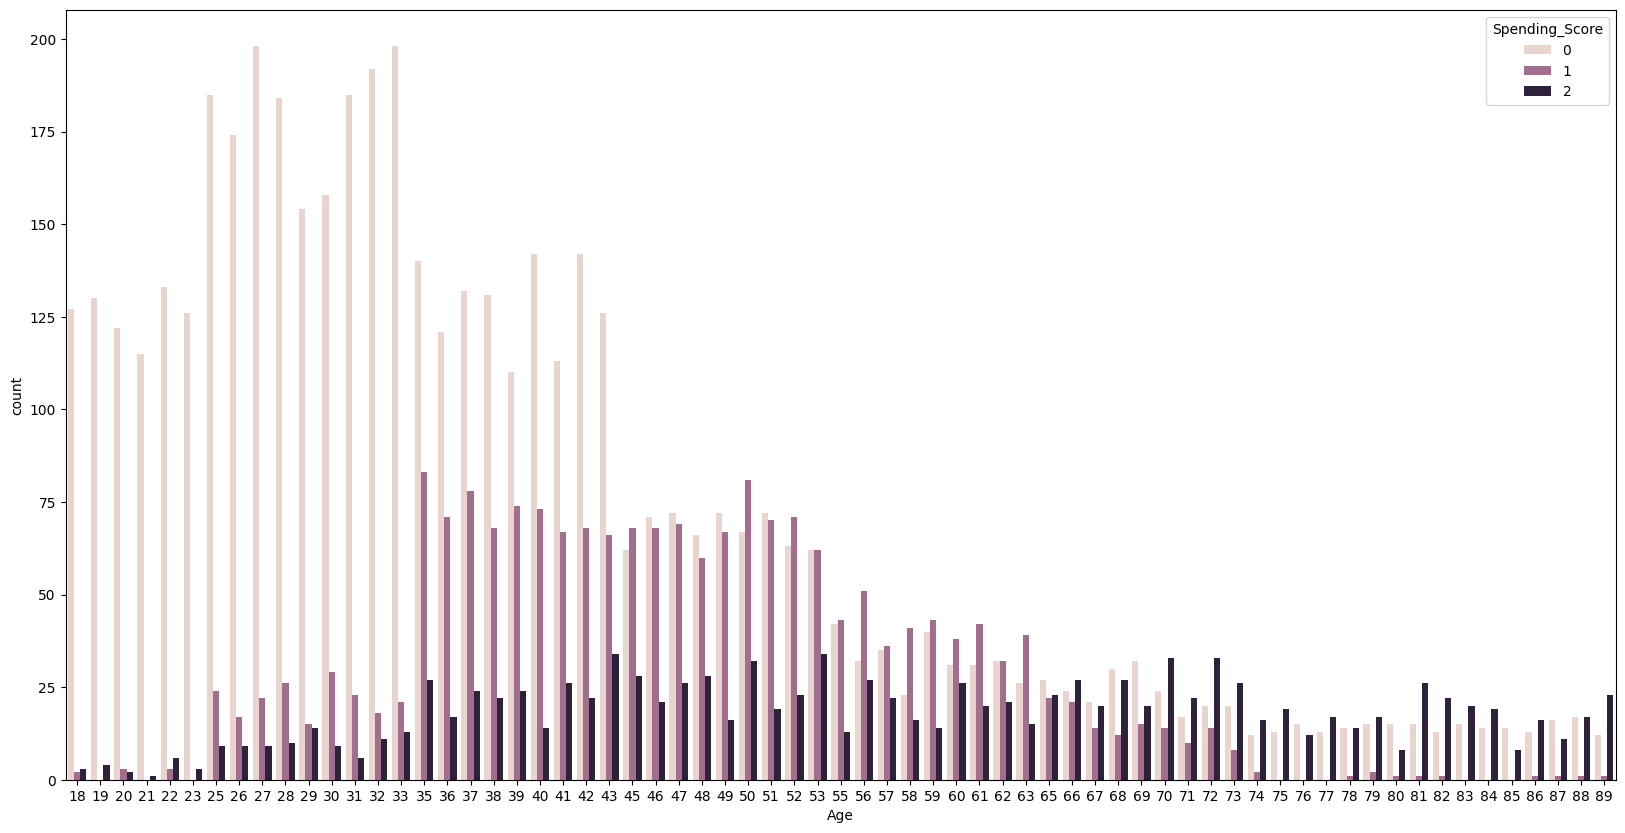

In [61]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age", data=train, hue="Spending_Score")
plt.show()

## **Var_1**

In [62]:
train['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [63]:
train['Var_1'].isnull().sum()

np.int64(76)

In [64]:

test["Var_1"].isnull().sum()

np.int64(32)

In [65]:
train['Var_1'] = train['Var_1'].fillna(6)
test['Var_1']= test['Var_1'].fillna(6)

In [66]:
train['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 6, 'Cat_5'],
      dtype=object)

In [67]:
train['Var_1'] = train['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
test['Var_1'] = test['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})


C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\2347704274.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Var_1'] = train['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})
C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\2347704274.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Var_1'] = test['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})


In [68]:
train['Var_1'].unique()

array([4, 6, 7, 3, 1, 2, 5])

In [69]:
train['Var_1'].isnull().sum()

np.int64(0)

## **Segmentation**

In [70]:
train['Segmentation'].isnull().sum()

np.int64(0)

In [71]:
test['Segmentation'].isnull().sum()

np.int64(0)

In [72]:
train['Segmentation']= le.fit_transform(train['Segmentation'])
test['Segmentation']= le.fit_transform(test['Segmentation'])

In [73]:
train['Segmentation'].unique()

array([3, 0, 1, 2])

C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\3723866888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['Segmentation'],palette='Set1')
C:\Users\Chandrabhushan\AppData\Local\Temp\ipykernel_9728\3723866888.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test['Segmentation'],palette='Set1')


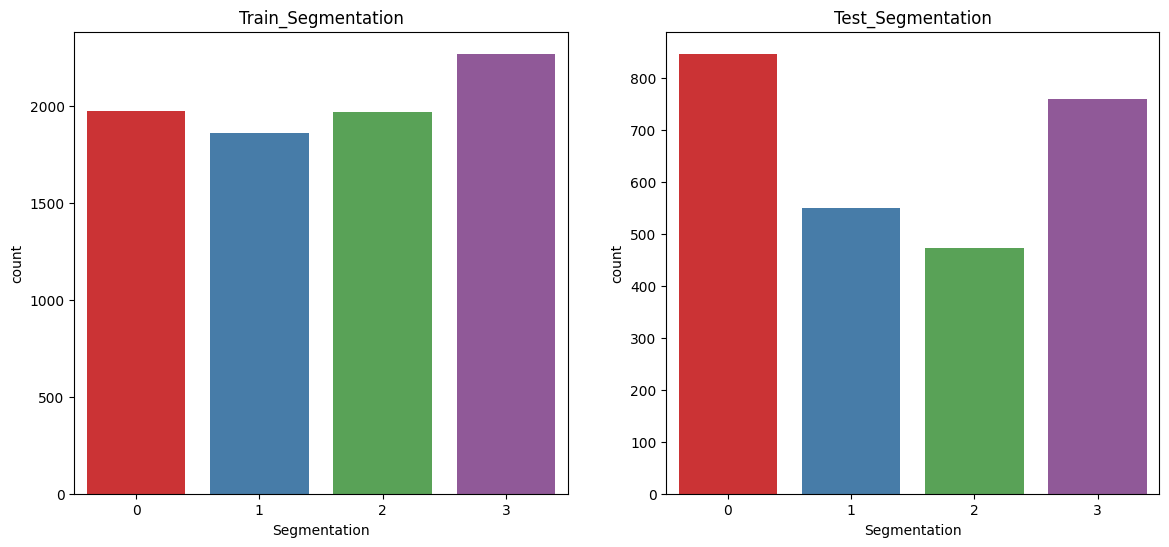

In [74]:
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)
sns.countplot(x=train['Segmentation'],palette='Set1')
plt.title('Train_Segmentation')
plt.subplot(1,2,2)
sns.countplot(x=test['Segmentation'],palette='Set1')
plt.title('Test_Segmentation')
plt.show()

## **Features Engineering**

In [75]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0.0,22,0.0,5,1.0,0,4.0,4,3
1,462643,0,1.0,38,1.0,2,1.0,1,3.0,4,0
2,466315,0,1.0,67,1.0,2,1.0,0,1.0,6,1
3,461735,1,1.0,67,1.0,7,0.0,2,2.0,6,1
4,462669,0,1.0,40,1.0,3,1.0,2,6.0,6,0


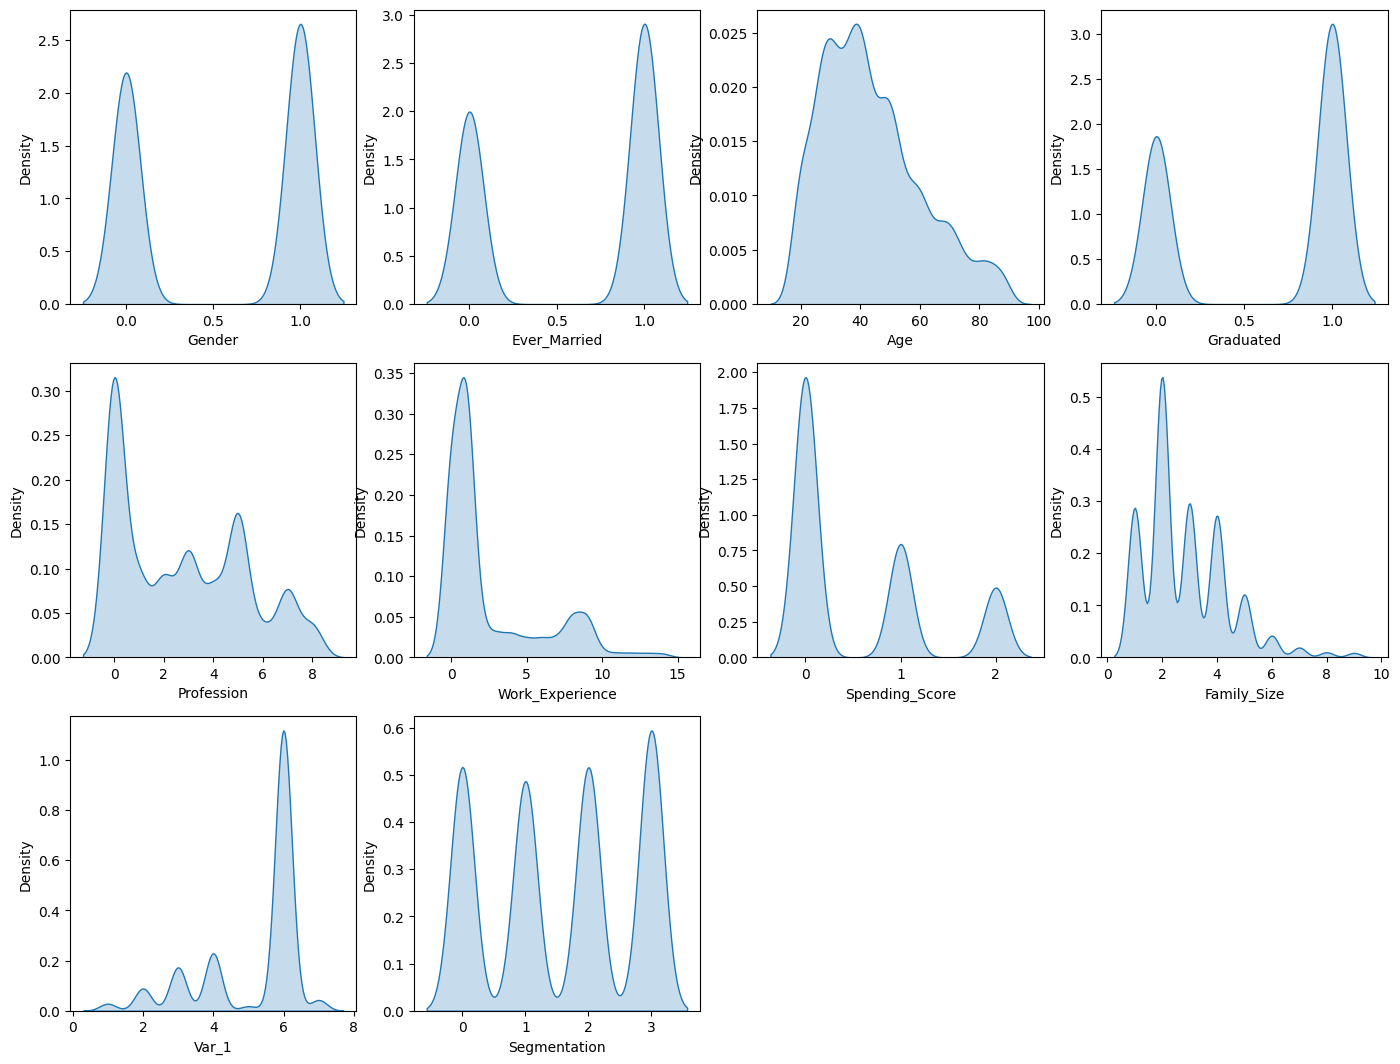

In [76]:
plt.figure(figsize=(17,13))
i=1
for col in train.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.kdeplot(train[col],fill =True)
  i+=1
plt.show()

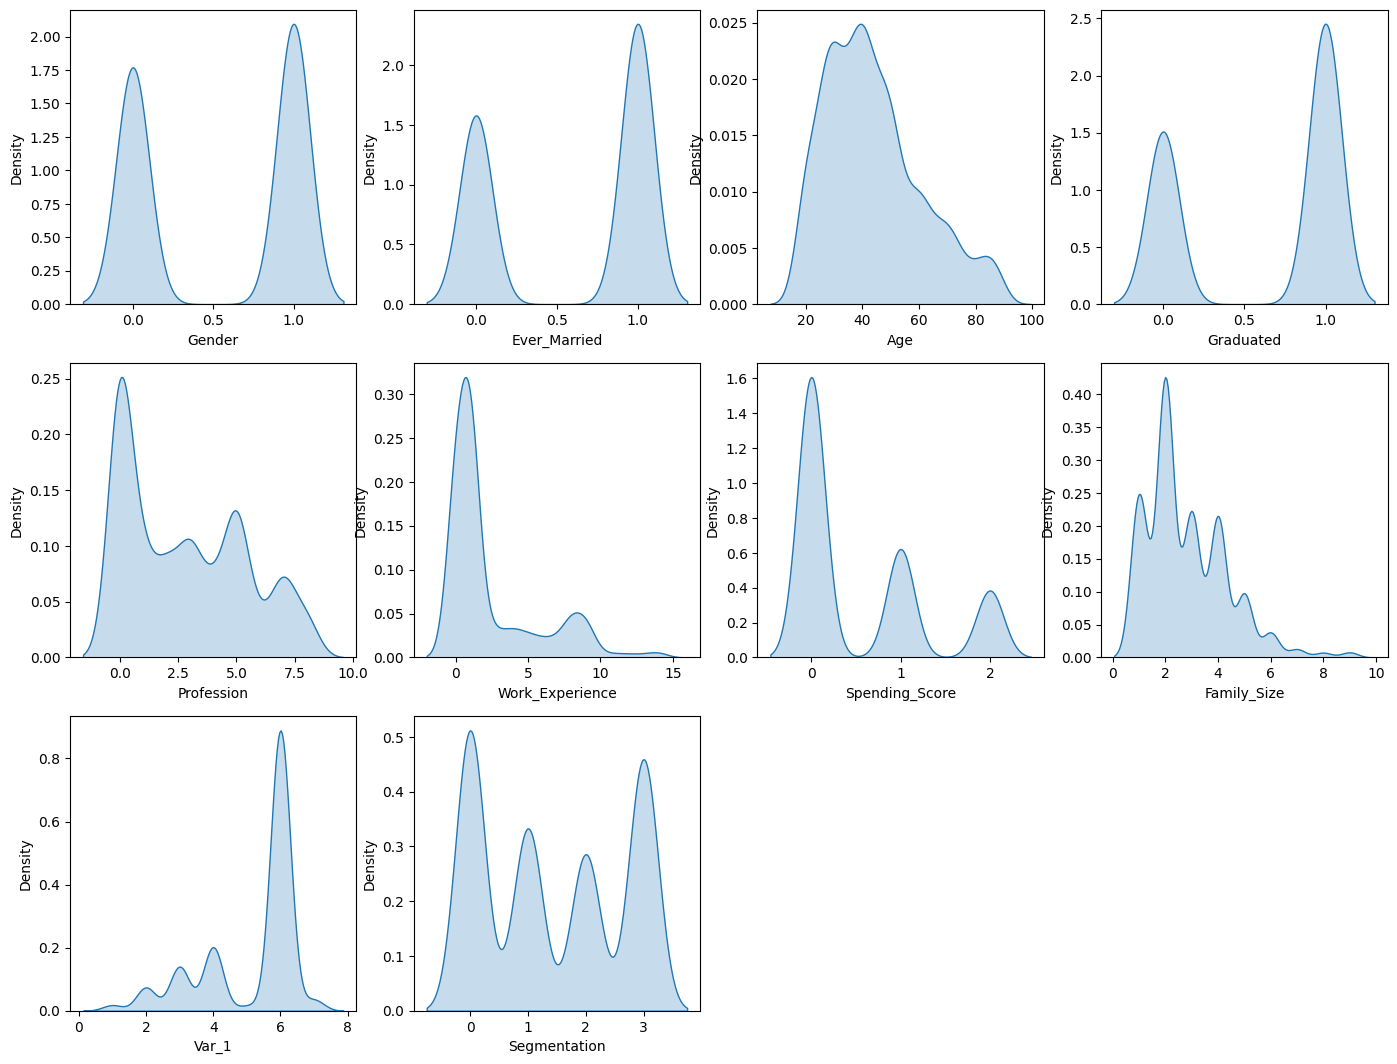

In [77]:
plt.figure(figsize=(17,13))
i=1
for col in test.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.kdeplot(test[col],fill =True)
  i+=1
plt.show()

## **Outliers**

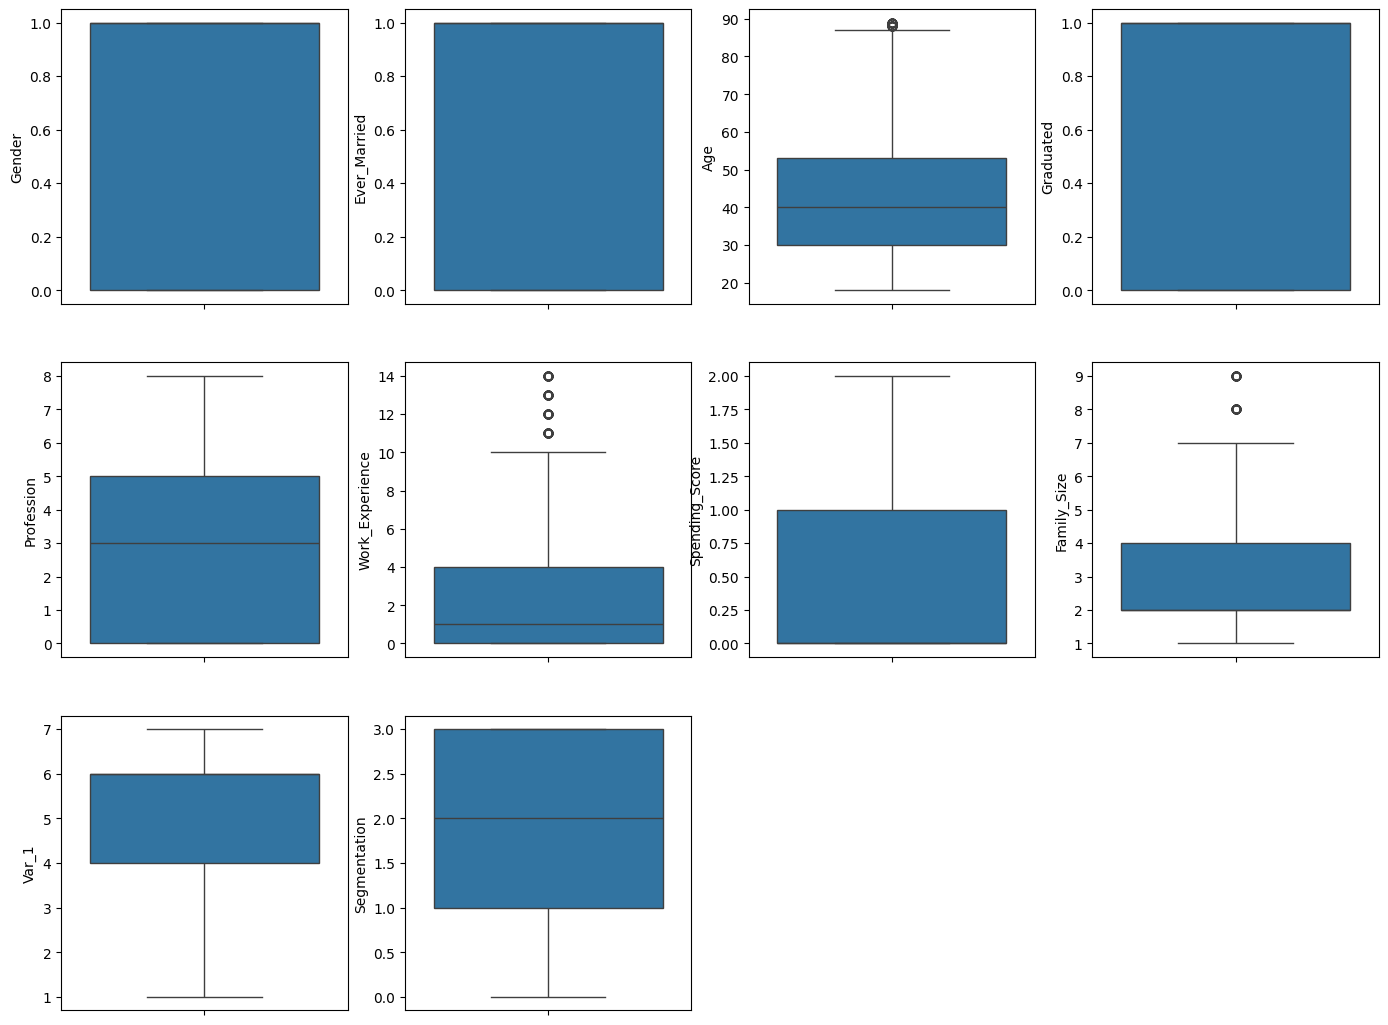

In [78]:
plt.figure(figsize=(17,13))
i=1
for col in train.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.boxplot(y= train[col],data=train)
  i+=1
plt.show()

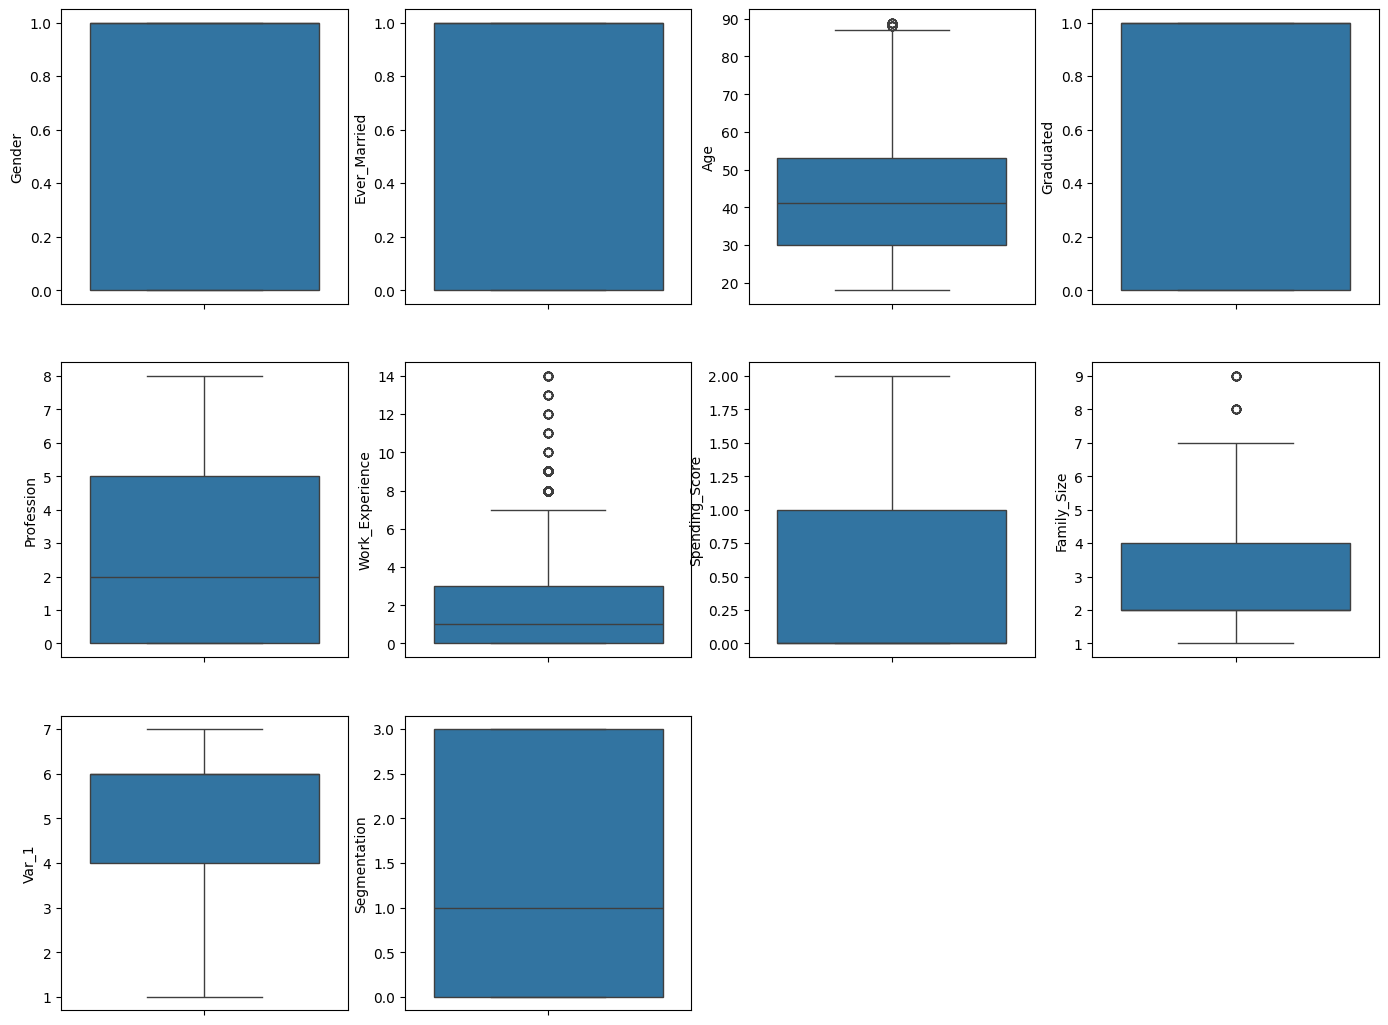

In [79]:
plt.figure(figsize=(17,13))
i=1
for col in test.iloc[:,1:]:
  plt.subplot(3,4,i)
  sns.boxplot(y= test[col],data=test)
  i+=1
plt.show()

###  **Behavioral Segmentation**

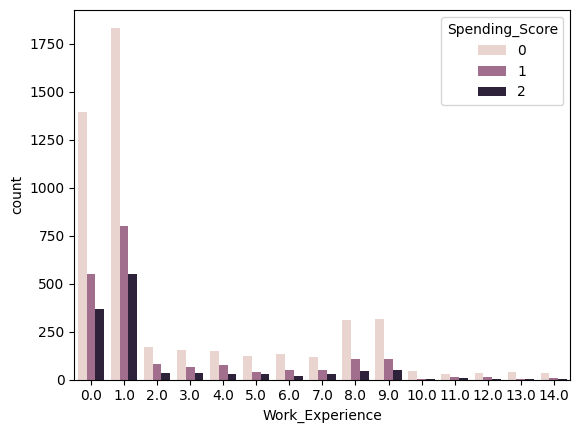

In [80]:
sns.countplot(x="Work_Experience", data=train, hue="Spending_Score")
plt.show()

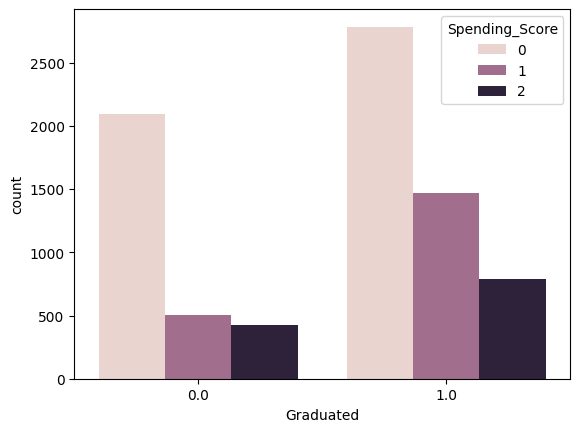

In [81]:
sns.countplot(x="Graduated", data=train, hue="Spending_Score")
plt.show()

## **Features Selection**

In [82]:
X_train = train.drop(['ID','Segmentation'],axis=1)
y_train = train['Segmentation']

In [83]:
X_test=test.drop(['ID','Segmentation'],axis = 1)
y_test = test['Segmentation']

In [84]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8068, 9), (8068,), (2627, 9), (2627,))

## **Feature Scaling**

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [86]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

In [87]:
X_train_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1.0,0.0,0.056338,0.0,0.625,0.071429,0.0,0.375,0.500000
1,0.0,1.0,0.281690,1.0,0.250,0.071429,0.5,0.250,0.500000
2,0.0,1.0,0.690141,1.0,0.250,0.071429,0.0,0.000,0.833333
3,1.0,1.0,0.690141,1.0,0.875,0.000000,1.0,0.125,0.833333
4,0.0,1.0,0.309859,1.0,0.375,0.071429,1.0,0.625,0.833333


In [88]:
X_test_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,1.0,0.253521,1.0,0.250,0.000000,0.0,0.000,0.833333
1,1.0,1.0,0.267606,1.0,0.625,0.571429,0.5,0.375,0.833333
2,0.0,1.0,0.718310,0.0,0.000,0.000000,0.0,0.000,0.833333
3,1.0,1.0,0.577465,0.0,0.500,0.785714,1.0,0.125,0.833333
4,0.0,0.0,0.014085,0.0,1.000,0.071429,0.0,0.375,0.833333


## **KMeans Model**

In [89]:
from sklearn.cluster import KMeans


### **Elbow Method**

In [90]:
Wcss = []
for i in range(1,11):
  model =KMeans(n_clusters = i,random_state=0)
  model.fit(X_train_scaled)
  Wcss.append(model.inertia_)
Wcss

[9382.620432492999,
 6769.670844681231,
 5612.146259270833,
 4714.726535600996,
 4023.6516205303665,
 3835.7925641259553,
 3740.606782320503,
 3161.4755591215335,
 2823.716991211142,
 2611.835585825455]

Text(0, 0.5, 'WCSS')

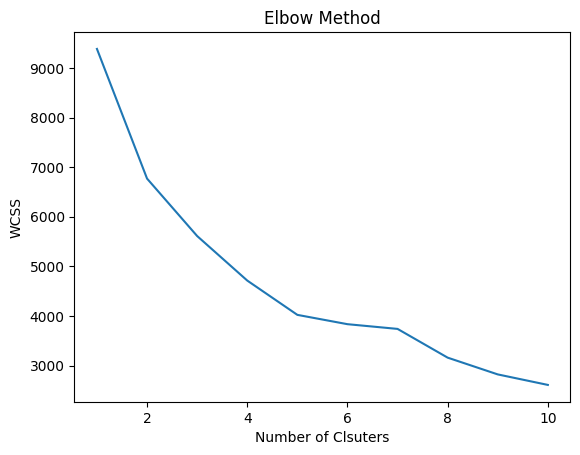

In [91]:
plt.plot(range(1,11),Wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clsuters")
plt.ylabel("WCSS")

In [92]:
Wcss = []
for i in range(1,11):
  model =KMeans(n_clusters = i,random_state=0)
  model.fit(X_test_scaled)
  Wcss.append(model.inertia_)
Wcss

[3061.0685587250073,
 2397.9107107571044,
 1928.352372251383,
 1717.1750531700955,
 1431.0900050368728,
 1350.8489981585617,
 1123.7319215943248,
 933.926763835111,
 909.8065785568278,
 838.3918348324278]

Text(0, 0.5, 'WCSS')

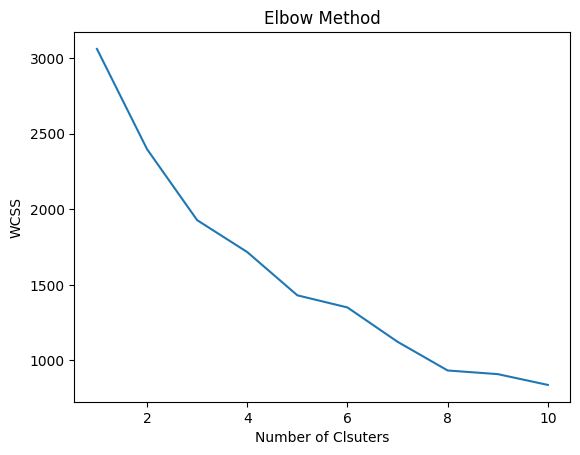

In [93]:
plt.plot(range(1,11),Wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clsuters")
plt.ylabel("WCSS")

In [94]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=3,random_state=0)
model.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=0)

## **Predication of train Data**

In [95]:
train_pred = model.predict(X_train_scaled)

In [96]:
train_pred[:100]

array([1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0,
       2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [97]:
y_train[:100].values

array([3, 0, 1, 1, 0, 2, 2, 3, 3, 2, 0, 3, 3, 0, 1, 2, 3, 1, 1, 2, 0, 3,
       0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 0, 2,
       0, 0, 1, 0, 3, 0, 1, 2, 0, 2, 0, 1, 3, 3, 2, 3, 2, 2, 3, 0, 0, 0,
       0, 0, 1, 0, 3, 0, 1, 3, 2, 1, 3, 0, 2, 3, 2, 3, 0, 1, 0, 3, 2, 2,
       3, 3, 1, 2, 2, 3, 1, 3, 3, 2, 2, 3])

In [98]:
X_train_scaled_new = X_train_scaled.copy()


In [99]:
X_train_scaled_new['Old_Target_Label'] = y_train
X_train_scaled_new['New_Target_Label'] = train_pred

In [100]:
X_train_scaled_new.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Old_Target_Label,New_Target_Label
0,1.0,0.0,0.056338,0.0,0.625,0.071429,0.0,0.375,0.500000,3,1
1,0.0,1.0,0.281690,1.0,0.250,0.071429,0.5,0.250,0.500000,0,0
2,0.0,1.0,0.690141,1.0,0.250,0.071429,0.0,0.000,0.833333,1,0
3,1.0,1.0,0.690141,1.0,0.875,0.000000,1.0,0.125,0.833333,1,2
4,0.0,1.0,0.309859,1.0,0.375,0.071429,1.0,0.625,0.833333,0,0


In [101]:

X_train_scaled_new['Old_Target_Label'].value_counts()


Old_Target_Label
3    2268
0    1972
2    1970
1    1858
Name: count, dtype: int64

In [102]:
X_train_scaled_new['New_Target_Label'].value_counts()


New_Target_Label
1    3285
2    2839
0    1944
Name: count, dtype: int64

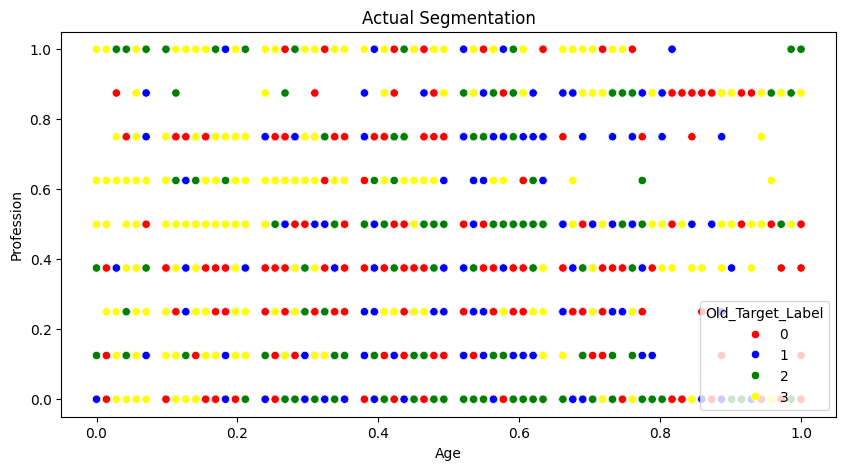

In [103]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_train_scaled_new['Age'],y=X_train_scaled_new['Profession'],
                hue=X_train_scaled_new['Old_Target_Label'],
                palette=['Red','Blue','Green','Yellow'])
plt.title("Actual Segmentation")
plt.show()

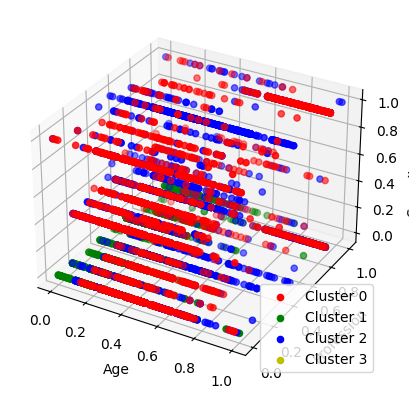

In [104]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b','y']
for cluster in range(4):
    ax.scatter(X_train_scaled_new[X_train_scaled_new['New_Target_Label'] == cluster]['Age'],
               X_train_scaled_new[X_train_scaled_new['New_Target_Label'] == cluster]['Profession'],
               X_train_scaled_new[X_train_scaled_new['New_Target_Label'] == cluster]['Spending_Score'],
               c=colors[cluster], label=f'Cluster {cluster}')

ax.set_xlabel('Age')
ax.set_ylabel('Profession')
ax.set_zlabel('Spending_Score')
plt.legend()
plt.show()

## **Predication of test Data**

In [105]:
test_pred = model.predict(X_test_scaled)

In [106]:
X_test_scaled_new = X_test_scaled.copy()


In [107]:
X_test_scaled_new['Old_Target_Label'] = y_test
X_test_scaled_new['New_Target_Label'] = test_pred

## **Silhouette Score Check performance**

In [110]:
!pip install yellowbrick
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [111]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=4, random_state=42)

In [112]:
train_pred = kmeans.predict(X_train_scaled)


## **Silhouette Score For train Data**

In [113]:
silhouette_avg = silhouette_score(X_train_scaled, train_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.298872961452178


## **Silhouette Score For Test Data**

In [114]:
test_pred = kmeans.predict(X_test_scaled)

# Calculate the silhouette score for Train data
silhouette_avg = silhouette_score(X_test_scaled, test_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3006645812606343


## *Visualization**

In [115]:
def silhouette_visualizer(data,model):
    visualizer=SilhouetteVisualizer(model,colors="yellowbrick")
    visualizer.fit(data)

## **Visualization of Train Data**

C:\Users\Chandrabhushan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


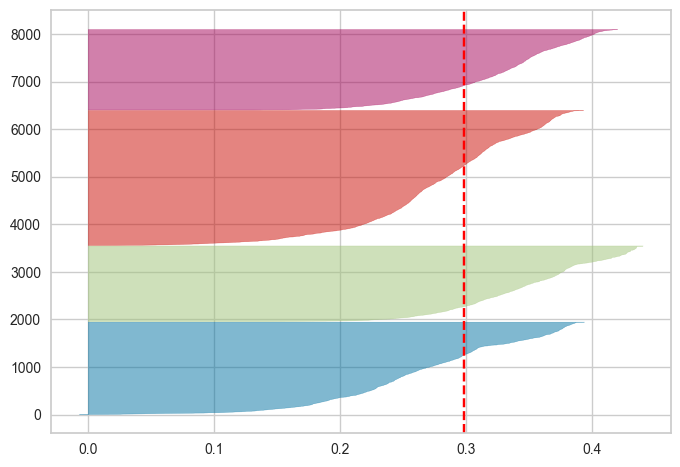

In [116]:
silhouette_visualizer(X_train_scaled,kmeans)
plt.show()

## **For test Data**

C:\Users\Chandrabhushan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


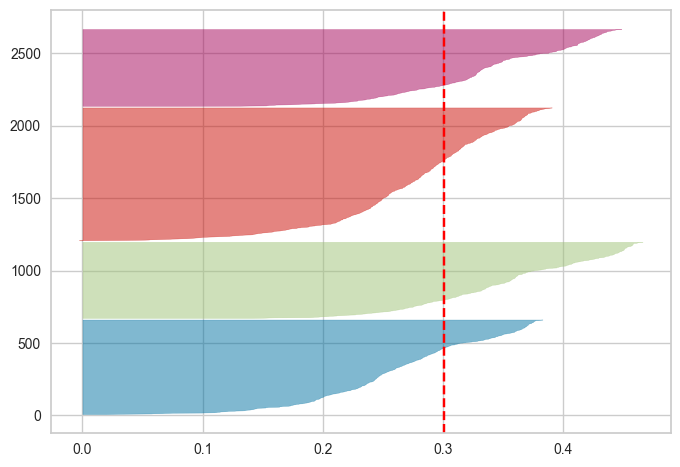

In [117]:
silhouette_visualizer(X_test_scaled,kmeans)

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotseg(data, labels, feature_names):
    plt.figure(figsize=(10, 6))

    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)

    legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.gca().add_artist(legend1)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    plt.title("Customer Segmentation based on K-Means Clustering")

    plt.show()


## **Age and Spending Score**

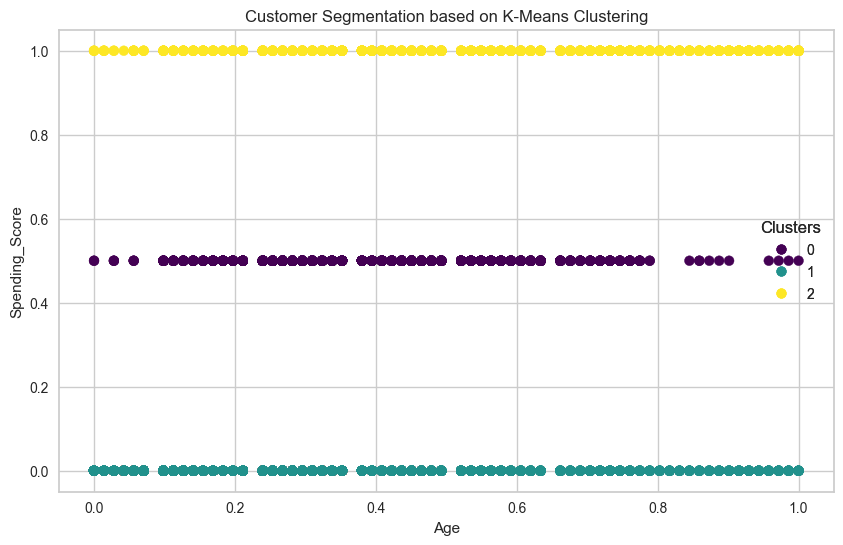

In [119]:
clus = X_train_scaled.loc[:, ["Age", "Spending_Score"]].values  # Age and Spending Score
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clus)

plotseg(clus, Y, ["Age", "Spending_Score"])


## **Family size and profession**

In [120]:
clus1 = train.loc[:,["Family_Size","Profession"]].values

In [121]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clus1)



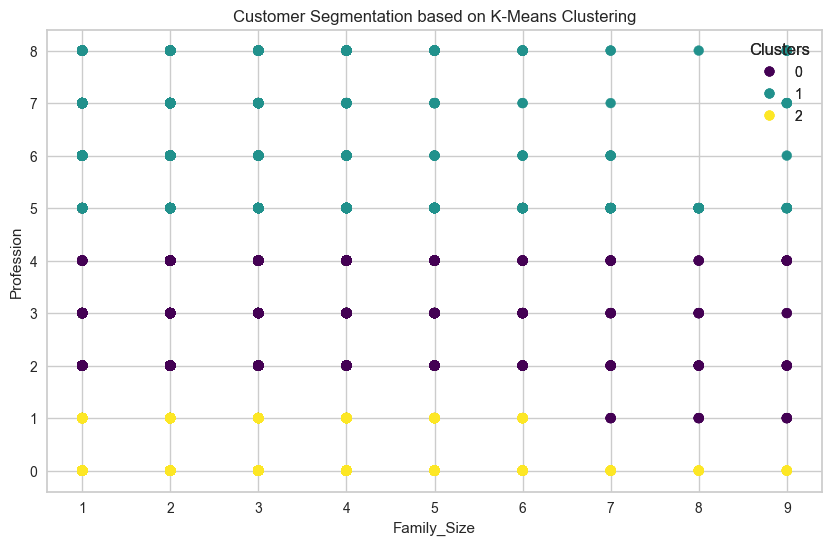

In [122]:
plotseg(clus1, Y, ["Family_Size","Profession"])
plt.show()

©️ Chandrabhushan Upadhyay